In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Titanic_dataset_kaggle.csv',usecols=['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [5]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [8]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

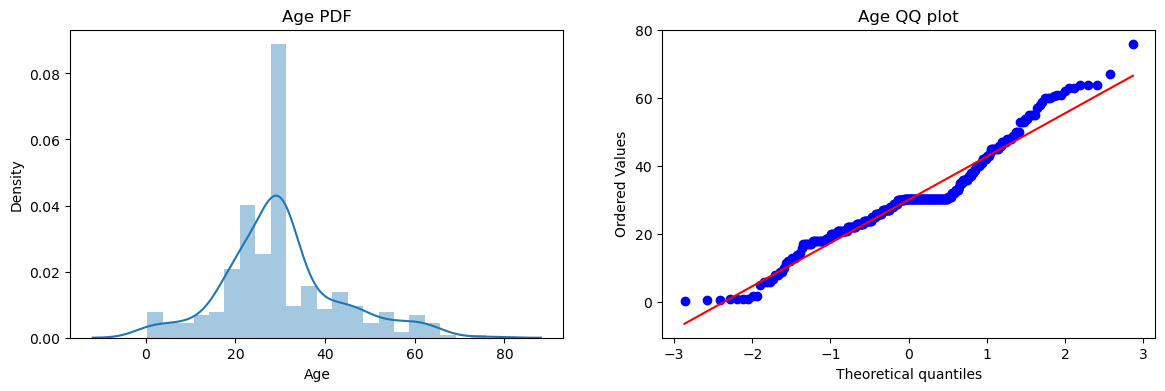

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

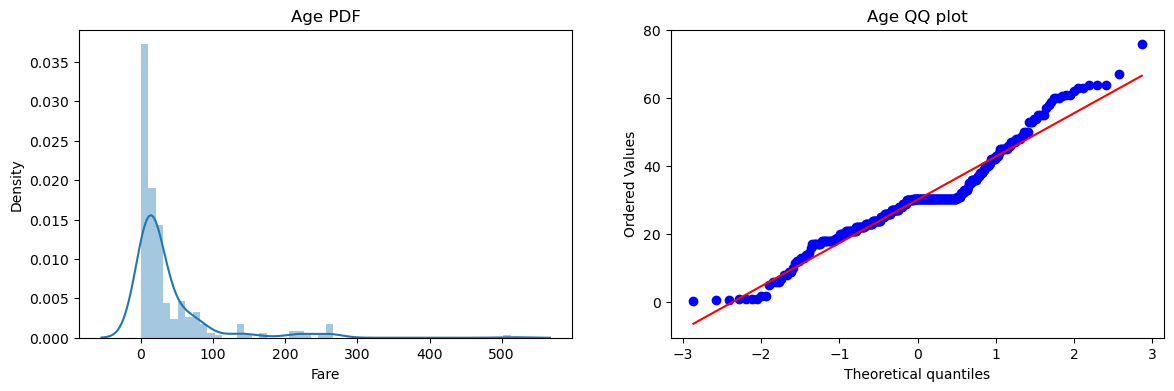

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create imputer: replace missing values with column mean (for numeric data)
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train and test sets
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Train models
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_imputed, y_train)
clf2.fit(x_train_imputed, y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))



Accuracy LR 0.6071428571428571
Accuracy DT 0.5714285714285714


In [18]:
trf=FunctionTransformer(func=np.log1p)

In [19]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
# Fill missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
x_train_filled = imputer.fit_transform(x_train_transformed)
x_test_filled = imputer.transform(x_test_transformed)

# Train models
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_filled, y_train)
clf2.fit(x_train_filled, y_train)

# Predictions
y_pred = clf.predict(x_test_filled)
y_pred1 = clf2.predict(x_test_filled)

# Accuracy
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred1))

Accuracy LR: 0.6190476190476191
Accuracy DT: 0.5595238095238095


In [26]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR nan
DT 0.5957607433217189


Text(0.5, 1.0, 'After Before log')

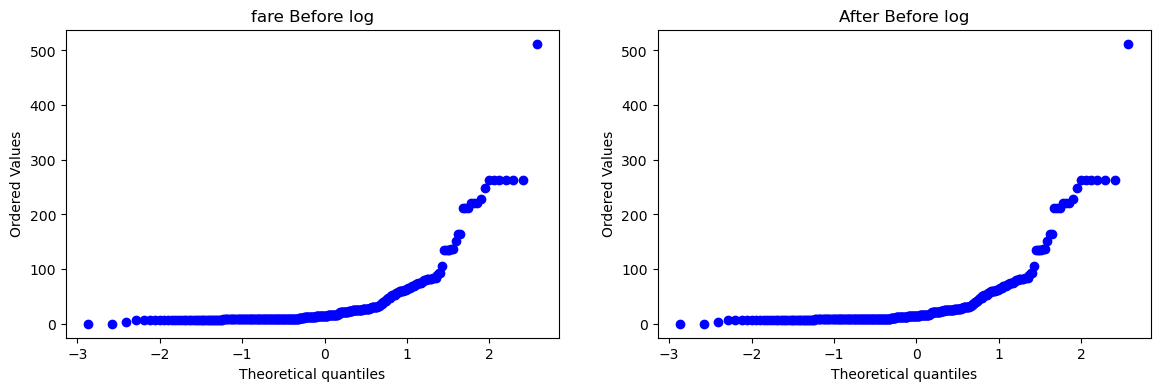

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('fare Before log')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('After Before log')

Text(0.5, 1.0, 'After Before log')

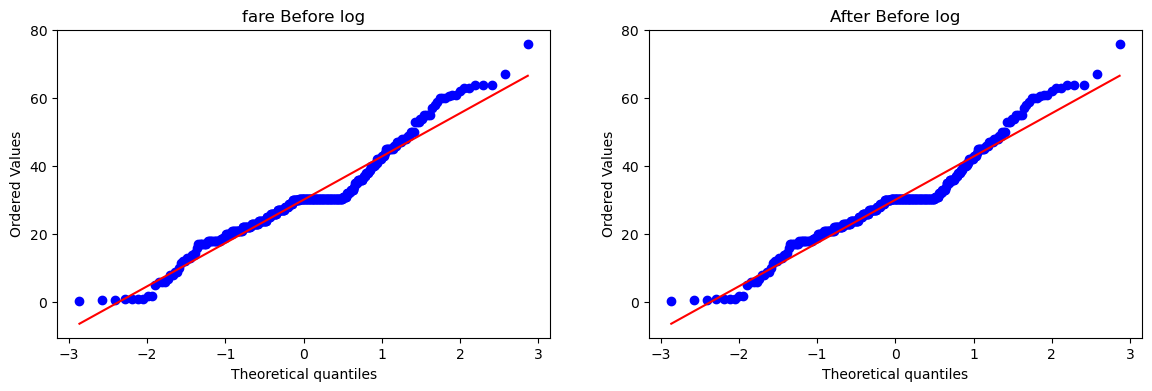

In [29]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('fare Before log')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('After Before log')

In [32]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [37]:
# Create imputer: replace missing values with column mean (for numeric data)
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train and test sets
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create imputer to replace NaN with column mean (for numeric data)
imputer = SimpleImputer(strategy='mean')

# Apply to both train and test data
x_train_filled = imputer.fit_transform(x_train_transformed2)
x_test_filled = imputer.transform(x_test_transformed2)

# Train models
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_filled, y_train)
clf2.fit(x_train_filled, y_train)

# Predict
y_pred = clf.predict(x_test_filled)
y_pred1 = clf2.predict(x_test_filled)

# Accuracy
print("Accuracy LR:", accuracy_score(y_test, y_pred))
print("Accuracy DT:", accuracy_score(y_test, y_pred1))


Accuracy LR: 0.6190476190476191
Accuracy DT: 0.5476190476190477


In [42]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR nan
DT 0.5813008130081301


In [43]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy nan


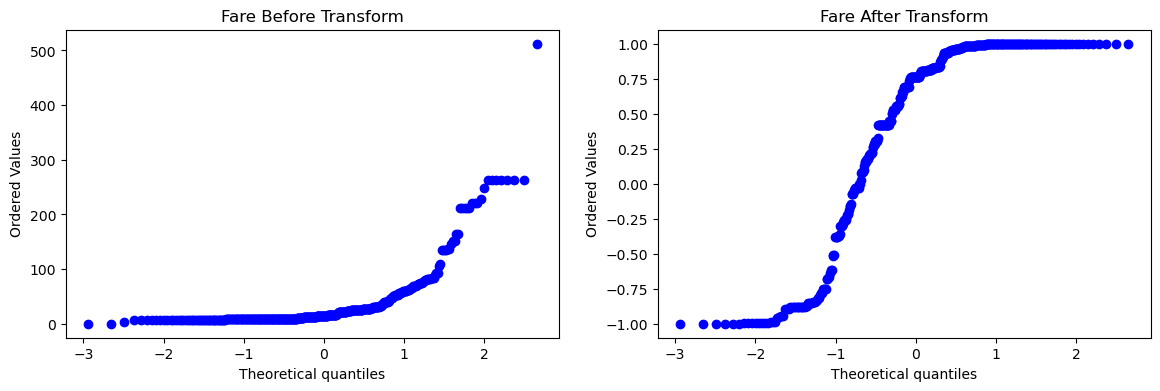

In [44]:
apply_transform(np.sin)